ASSIGNMENT: SVM-3

  In order to predict house price based on several characteristics, such as location, square footage, 
number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this 
situation would be the best to employ?

When developing an SVM regression model to predict house prices based on several characteristics, the best regression metric to employ would be the mean squared error (MSE). This is because MSE measures the average squared difference between the predicted and actual values. This metric is particularly useful in regression problems where the goal is to minimize the distance between predicted and actual values. Additionally, MSE is widely used in machine learning applications and is a reliable indicator of the model's overall performance. Other metrics that can be considered include mean absolute error (MAE), root mean squared error (RMSE), and R-squared. However, in this particular case, MSE is the most appropriate metric.

In [1]:
# Building a SVR Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\\DATA_PLACEMENT\\SVM\\Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape

(13320, 9)

In [7]:
df['society'].nunique()


2688

In [8]:
df['society'] = df['society'].fillna('unknown')


In [9]:
df['balcony'].nunique()


4

In [10]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [11]:
df['bath'].nunique()


19

In [12]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [13]:
df['size'].nunique()


31

In [14]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [15]:
df['location'].nunique()


1305

In [16]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [17]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [18]:
df.shape

(13320, 9)

In [19]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,unknown,1200,2.0,1.0,51.00


In [20]:
df['area_type'].nunique()


4

<AxesSubplot:xlabel='society', ylabel='price'>

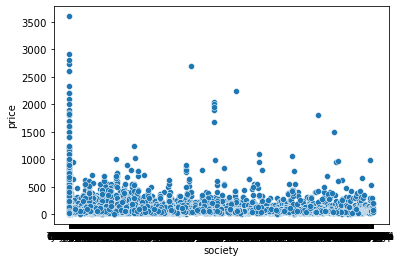

In [21]:
sns.scatterplot(x='society',y='price',data=df)

In [22]:
# it seems society column is not much important to price prediction, so we can drop this coloumn

In [23]:
df = df.drop('society', axis=1)


<AxesSubplot:xlabel='area_type', ylabel='price'>

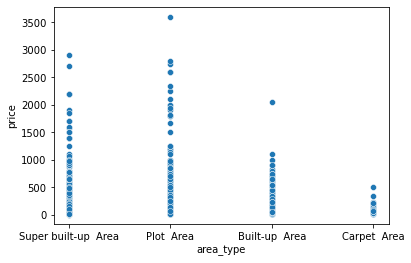

In [24]:
sns.scatterplot(x='area_type',y='price',data=df)

<AxesSubplot:xlabel='availability', ylabel='price'>

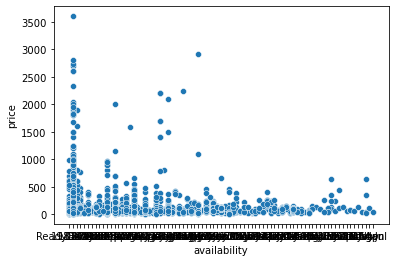

In [25]:
sns.scatterplot(x='availability',y='price',data=df)

<AxesSubplot:xlabel='location', ylabel='price'>

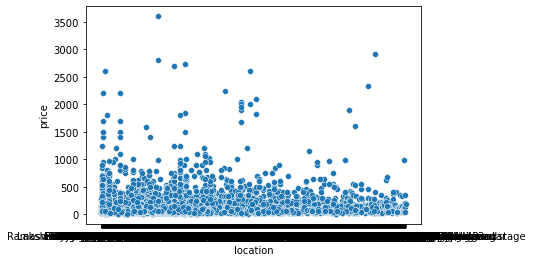

In [26]:
sns.scatterplot(x='location',y='price',data=df)

In [27]:
df = df.drop('location', axis=1)


In [28]:
df = df.drop('availability', axis=1)


In [29]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


<AxesSubplot:xlabel='size', ylabel='price'>

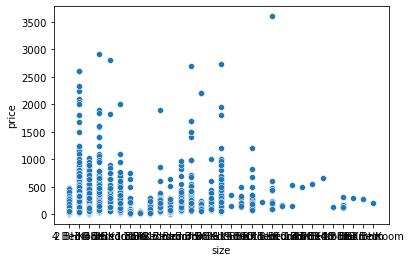

In [30]:
sns.scatterplot(x='size',y='price',data=df)

In [31]:
df['size'] = df['size'].str.replace('Bedroom','').str.strip()
df['size'] = df['size'].str.replace('BHK','').str.strip()



In [32]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2,1056,2.0,1.0,39.07
1,Plot Area,4,2600,5.0,3.0,120.00
2,Built-up Area,3,1440,2.0,3.0,62.00
3,Super built-up Area,3,1521,3.0,1.0,95.00
4,Super built-up Area,2,1200,2.0,1.0,51.00


<AxesSubplot:xlabel='size', ylabel='price'>

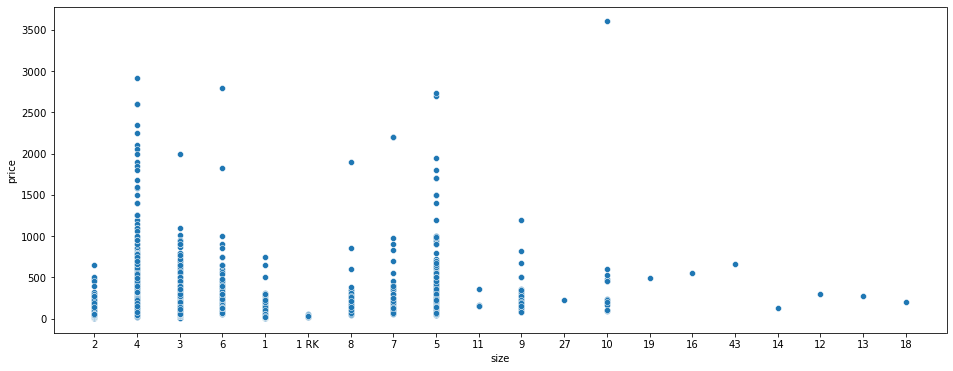

In [34]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='size',y='price',data=df)

In [38]:
df['size'] = df['size'].str.replace('K', '')


In [39]:
df.head(2)

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2,1056,2.0,1.0,39.07
1,Plot Area,4,2600,5.0,3.0,120.00


<AxesSubplot:xlabel='size', ylabel='price'>

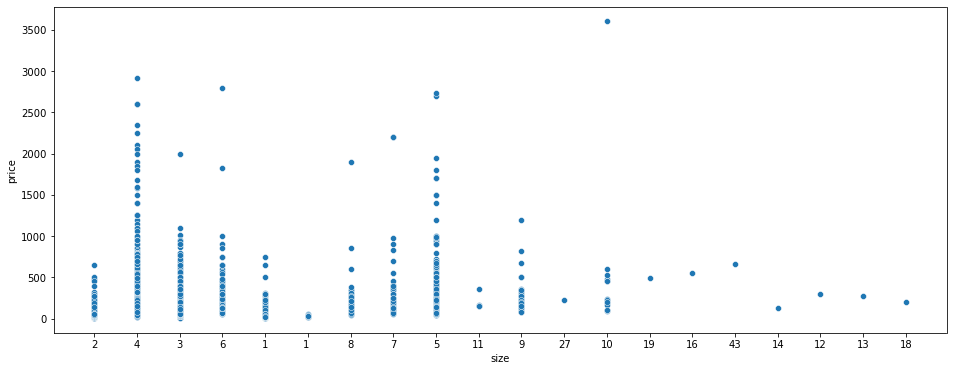

In [40]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='size',y='price',data=df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [42]:
df['size'] = df['size'].astype(int)


In [43]:
import re

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [45]:
df = pd.get_dummies(df, columns=['area_type'])


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   total_sqft                      13274 non-null  float64
 2   bath                            13320 non-null  float64
 3   balcony                         13320 non-null  float64
 4   price                           13320 non-null  float64
 5   area_type_Built-up  Area        13320 non-null  uint8  
 6   area_type_Carpet  Area          13320 non-null  uint8  
 7   area_type_Plot  Area            13320 non-null  uint8  
 8   area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(4), int32(1), uint8(4)
memory usage: 520.4 KB


In [47]:
df.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2,1056.0,2.0,1.0,39.07,0,0,0,1
1,4,2600.0,5.0,3.0,120.00,0,0,1,0
2,3,1440.0,2.0,3.0,62.00,1,0,0,0
3,3,1521.0,3.0,1.0,95.00,0,0,0,1
4,2,1200.0,2.0,1.0,51.00,0,0,0,1


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

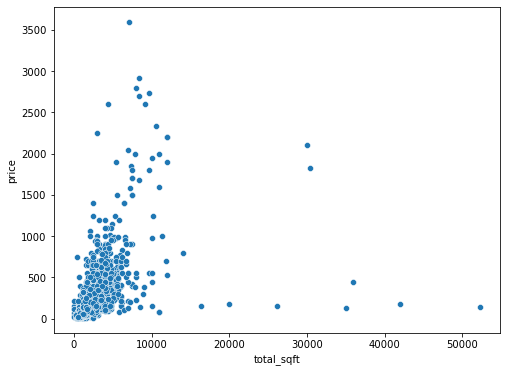

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft',y='price',data=df)

In [51]:
corr=df.corr()

In [53]:
corr

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
size,1.000000,0.347455,0.895786,0.194358,0.398074,-0.004080,-0.008526,0.405992,-0.302932
total_sqft,0.347455,1.000000,0.389223,0.154499,0.575559,0.022418,-0.016599,0.095952,-0.088057
bath,0.895786,0.389223,1.000000,0.207970,0.454449,-0.014629,-0.011088,0.376291,-0.271403
balcony,0.194358,0.154499,0.207970,1.000000,0.124951,-0.062810,-0.016821,-0.081458,0.115703
price,0.398074,0.575559,0.454449,0.124951,1.000000,-0.026177,-0.012553,0.272669,-0.183222
area_type_Built-up Area,-0.004080,0.022418,-0.014629,-0.062810,-0.026177,1.000000,-0.038186,-0.199409,-0.656025
area_type_Carpet Area,-0.008526,-0.016599,-0.011088,-0.016821,-0.012553,-0.038186,1.000000,-0.034332,-0.112947
area_type_Plot Area,0.405992,0.095952,0.376291,-0.081458,0.272669,-0.199409,-0.034332,1.000000,-0.589814
area_type_Super built-up Area,-0.302932,-0.088057,-0.271403,0.115703,-0.183222,-0.656025,-0.112947,-0.589814,1.000000


<AxesSubplot:>

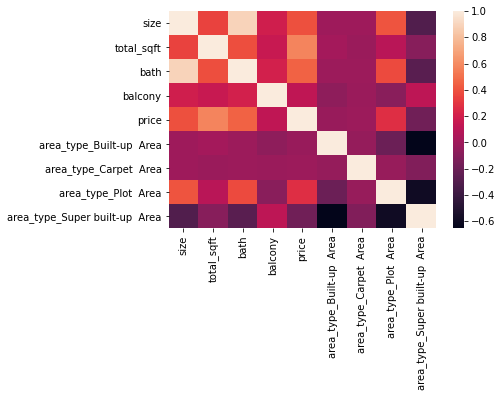

In [52]:
sns.heatmap(corr)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   total_sqft                      13320 non-null  float64
 2   bath                            13320 non-null  float64
 3   balcony                         13320 non-null  float64
 4   price                           13320 non-null  float64
 5   area_type_Built-up  Area        13320 non-null  uint8  
 6   area_type_Carpet  Area          13320 non-null  uint8  
 7   area_type_Plot  Area            13320 non-null  uint8  
 8   area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(4), int32(1), uint8(4)
memory usage: 624.4 KB


In [56]:
df.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2,1056.0,2.0,1.0,39.07,0,0,0,1
1,4,2600.0,5.0,3.0,120.00,0,0,1,0
2,3,1440.0,2.0,3.0,62.00,1,0,0,0
3,3,1521.0,3.0,1.0,95.00,0,0,0,1
4,2,1200.0,2.0,1.0,51.00,0,0,0,1


In [58]:
X = df.drop("price", axis=1)


In [59]:
X.head()

,size,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2,1056.0,2.0,1.0,0,0,0,1
1,4,2600.0,5.0,3.0,0,0,1,0
2,3,1440.0,2.0,3.0,1,0,0,0
3,3,1521.0,3.0,1.0,0,0,0,1
4,2,1200.0,2.0,1.0,0,0,0,1


In [60]:
y= df['price']

In [61]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler


In [64]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


<AxesSubplot:>

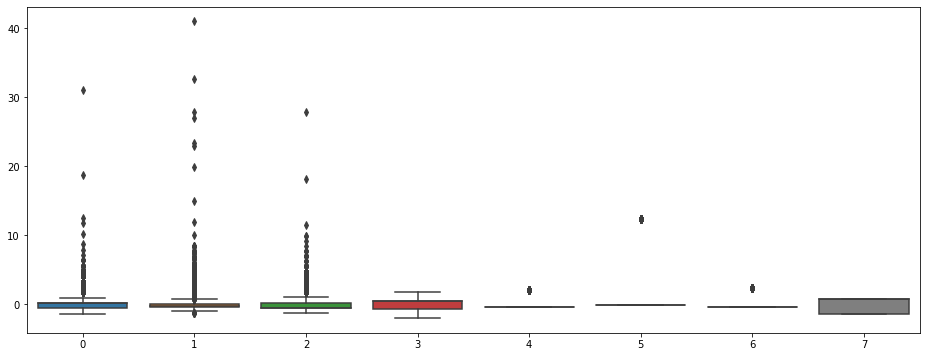

In [66]:
plt.figure(figsize=(16, 6))

sns.boxplot(data=X_std)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)


In [73]:
X_train.shape

(9324, 8)

In [74]:
X_test.shape

(3996, 8)

In [90]:
import numpy as np
print(np.isnan(X_train).sum())  # count the number of missing values in X_train
print(np.isinf(X_train).sum())  # count the number of infinite values in X_train


0
0


In [95]:
X_train[:5]

array([[ 0.15236022,  0.35561049,  0.2324534 ,  0.49390203, -0.47095028,
        -0.08108312, -0.42341808,  0.71788464],
       [ 0.15236022,  0.67942622,  0.2324534 ,  0.49390203, -0.47095028,
        -0.08108312, -0.42341808,  0.71788464],
       [ 0.15236022,  0.25063282,  0.2324534 ,  0.49390203, -0.47095028,
        -0.08108312, -0.42341808,  0.71788464],
       [-1.39270118, -0.77491826, -1.26152937, -1.99664315, -0.47095028,
        -0.08108312, -0.42341808,  0.71788464],
       [ 0.92489092,  2.47494811, -0.51453799,  0.49390203, -0.47095028,
        -0.08108312, -0.42341808,  0.71788464]])

In [96]:
y_train[:5]

3349    200.0
2909    185.0
8229     90.0
42       38.0
801     453.0
Name: price, dtype: float64

In [102]:
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean()).values
y_train = pd.DataFrame(y_train).fillna(pd.DataFrame(y_train).mean()).values
X_test =  pd.DataFrame(X_test).fillna(pd.DataFrame(X_test).mean()).values
y_test =  pd.DataFrame(y_test).fillna(pd.DataFrame(y_test).mean()).values

In [98]:
from sklearn.svm import SVR

In [99]:
regressor = SVR(kernel='linear')


In [100]:
regressor.fit(X_train, y_train)


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [103]:
y_pred = regressor.predict(X_test)

# Calculate the R-squared value
r_squared = regressor.score(X_test, y_test)

# Print the R-squared value
print("R-squared value:", r_squared)

R-squared value: 0.518950404893745


In [104]:
from sklearn.model_selection import GridSearchCV

# define the parameters to tune
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(SVR(), parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.416305592089913


In [105]:
from sklearn.svm import SVR

# create a new instance of SVR with tuned hyperparameters
regressor_tuned = SVR(kernel='rbf', C=10, gamma=0.1)

# fit the model to the training data
regressor_tuned.fit(X_train, y_train)


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=10, gamma=0.1)

In [107]:
y_pred = regressor_tuned.predict(X_test)

# Calculate the R-squared value
r_squared = regressor_tuned.score(X_test, y_test)

# Print the R-squared value
print("R-squared value:", r_squared)

R-squared value: 0.4040940435556428


In [108]:
from sklearn.metrics import mean_squared_error

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the MSE score
mse_score = mean_squared_error(y_test, y_pred)

# print the MSE score
print("MSE score:", mse_score)


MSE score: 11055.208408190703


In [109]:
y_pred = regressor_tuned.predict(X_test)

# calculate the MSE score
mse_score = mean_squared_error(y_test, y_pred)

# print the MSE score
print("MSE score:", mse_score)

MSE score: 13694.772030146793


In [111]:
from sklearn.metrics import r2_score

# Define a function to calculate adjusted R-squared
def adj_r2_score(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
adj_r2 = adj_r2_score(r2, len(y_test), X_test.shape[1])
print('Adjusted R-squared:', adj_r2)


Adjusted R-squared: 0.5179851686858569
